# Part a

In [558]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, lognorm



In [559]:
#function for calculating V30
def calcV30(p, c, mu, sigma, Z):
    V_30 = 0
    # Outer sum over k
    for k in range(1, 31):  # k ranges from 1 to 30
        # Compute the product over j for this k
        product = 1
        for j in range(k, 31):  # j ranges from 1 to 30
            t=p * (1 - c * (j - 1) / 30)
            term1 = t * np.exp(mu + sigma * Z[j - 1])
            term2 = (1 - t) * np.exp(0.01)
            product *= (term1 + term2)
        V_30 += product
    V_30 *= 1000
    return V_30


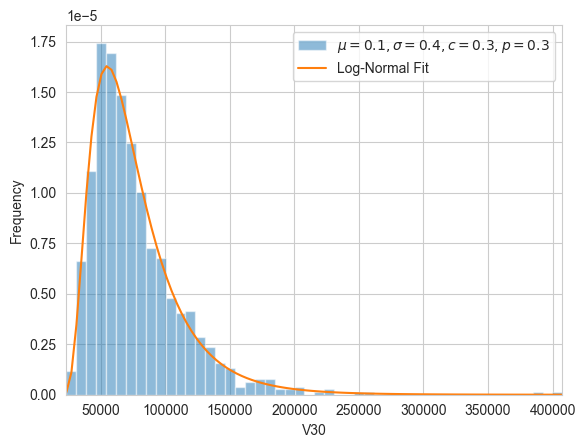

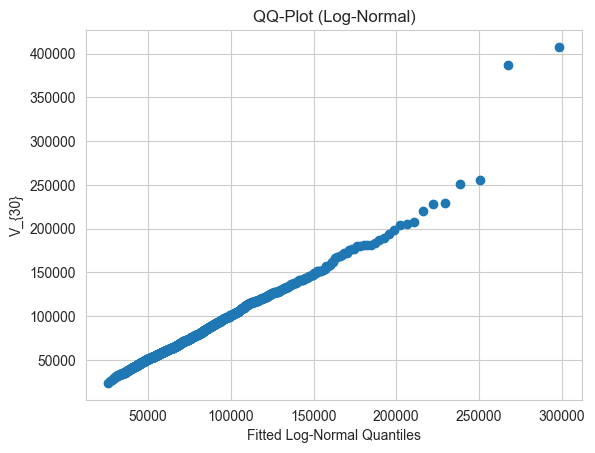

In [560]:
#Part a code:
p = 0.3
c = 0.3
mu = 0.1
sigma = 0.4

n=1000
Z = np.random.normal(0, 1, (n, 30)) #Matrix with n rows and 30 columns

V_30list=np.zeros(n)
for i in range(n):
    V_30list[i] = calcV30(p, c, mu, sigma, Z[i,:])

np.mean(V_30list)

#tparams = t.fit(V_30list)
#nparams = norm.fit(V_30list)
lognparams = lognorm.fit(V_30list)

plt.hist(V_30list, bins=50, alpha=0.5, density=True,label=f"$\mu={mu}, \sigma={sigma}, c={c}, p={p}$"
)
x = np.linspace(min(V_30list), max(V_30list), 100)
#plt.plot(x, norm.pdf(x, *nparams), label="Normal Fit")
plt.plot(x, lognorm.pdf(x, *lognparams), label="Log-Normal Fit")
#plt.plot(x, t.pdf(x, *tparams), label="T Fit")
plt.xlabel("V30")
plt.ylabel("Frequency")
plt.xlim(min(V_30list), max(V_30list))
plt.legend()
plt.show()

#Some QQ plots:
u = np.arange(1, len(V_30list) + 1) / (len(V_30list) + 1)
#plt.scatter(nparams[0]+nparams[1]*norm.ppf(u), np.sort(V_30list))
#plt.xlabel("Fitted Normal Quantiles")
#plt.ylabel("V_30 values")
#plt.title("QQ-Plot (Normal)")
#plt.show()

#plt.scatter(tparams[1] + tparams[2] * t.ppf(u, tparams[0]), np.sort(V_30list))
#plt.xlabel("Fitted Student's T Quantiles")
#plt.ylabel("V_30 values")
#plt.title("QQ-Plot (Student's T)")
#plt.show()

plt.scatter(lognorm.ppf(u, s=lognparams[0], loc=lognparams[1], scale=lognparams[2]), np.sort(V_30list))
plt.xlabel("Fitted Log-Normal Quantiles")
plt.ylabel("V_{30}")
plt.title("QQ-Plot (Log-Normal)")
plt.show()



In [561]:
from matplotlib.ticker import ScalarFormatter
Z = np.random.normal(0, 1, (n, 30))  # Matrix with n rows and 30 columns

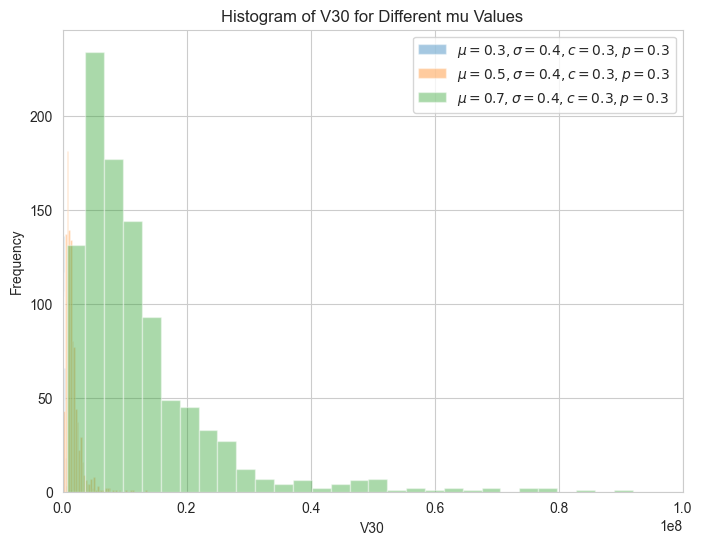

In [562]:

p=0.3
plist = [0.7,0.5,0.3]
c = 0.3
clist=[0.7,0.5,0.3]
mu = 0.1
mulist=[0.3,0.5,0.7]
sigma = 0.4
sigmalist=[0.3,0.5,0.7]
n = 1000

# Prepare the plot
plt.figure(figsize=(8, 6))

for j in mulist:
    # Generate random data
    
    V_30list = np.zeros(n)
    for i in range(n):
        V_30list[i] = calcV30(p, c, j, sigma, Z[i, :])
    
    # Plot histogram for current p
    plt.hist(V_30list, bins=50, alpha=0.4, label=f"$\mu={j}, \sigma={sigma}, c={c}, p={p}$")

# Add labels and legend
plt.xlabel("V30")
plt.ylabel("Frequency")
plt.title("Histogram of V30 for Different mu Values")
plt.legend(loc='upper right')
plt.xlim(0,100000000)
# Disable scientific notation on x-axis
#plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
#plt.ticklabel_format(style='plain', axis='x')

plt.show()
